## ```Imports```
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import pickle

In [2]:
fraud = pd.read_csv('/Users/crivera/Desktop/capstone-dsir82/capstone_data/final_model.csv')

In [3]:
fraud.shape

(361064, 18)

In [4]:
fraud['is_fraud'].value_counts(normalize=True)

0    0.994076
1    0.005924
Name: is_fraud, dtype: float64

In [5]:
fraud.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour
0,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21 00:00:00,40.202538,-73.859212,0,0
1,2019-01-01 00:29:11,4789911625179723,"fraud_Mosciski, Gislason and Mertz",grocery_pos,221.81,F,Moriches,NY,11955,40.8095,-72.8229,3285,"Research officer, trade union",1988-04-27 00:00:00,40.011959,-72.594808,0,0
2,2019-01-01 00:31:01,30011465039817,fraud_Howe Ltd,misc_pos,54.02,F,Chatham,NY,12037,42.3496,-73.5873,4015,Human resources officer,1971-10-14 00:00:00,42.041783,-73.076424,0,0


## ```Creating Smote Balanced Classes Data Set for final Modeling```
---

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361064 entries, 0 to 361063
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  361064 non-null  object 
 1   cc_num                 361064 non-null  int64  
 2   merchant               361064 non-null  object 
 3   category               361064 non-null  object 
 4   amt                    361064 non-null  float64
 5   gender                 361064 non-null  object 
 6   city                   361064 non-null  object 
 7   state                  361064 non-null  object 
 8   zip                    361064 non-null  int64  
 9   lat                    361064 non-null  float64
 10  long                   361064 non-null  float64
 11  city_pop               361064 non-null  int64  
 12  job                    361064 non-null  object 
 13  dob                    361064 non-null  object 
 14  merch_lat              361064 non-nu

In [7]:
# dummy for object variables
df_fraud = fraud.copy()
df_fraud = pd.get_dummies(fraud, columns=['gender','city','state','category','merchant'])
df_fraud.shape

(361064, 980)

In [8]:
df_fraud.head(2)

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,job,dob,merch_lat,...,"merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,2019-01-01 00:26:22,3598215285024754,207.36,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21 00:00:00,40.202538,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 00:29:11,4789911625179723,221.81,11955,40.8095,-72.8229,3285,"Research officer, trade union",1988-04-27 00:00:00,40.011959,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#set up X/y
X = df_fraud.drop(columns=['trans_date_trans_time','lat','long','job','merch_lat','merch_long','dob','is_fraud'])
y = df_fraud['is_fraud']
print(f"Target is_fraud value_counts: {y.value_counts()}")

# Instantiate Smote Class
smo = SMOTE(random_state=42)

print('====')
# Synthetically enhance minority class
X_smo, y_smo = smo.fit_resample(X,y)
print(f"Smote Target value_counts: {y_smo.value_counts()}")

Target is_fraud value_counts: 0    358925
1      2139
Name: is_fraud, dtype: int64
====
Smote Target value_counts: 0    358925
1    358925
Name: is_fraud, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression

X = df_fraud.drop(columns=['trans_date_trans_time','lat','long','job','merch_lat','merch_long','dob','is_fraud'])
y = df_fraud['is_fraud']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.7)

# standard scale
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# train model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_ss,y_train)

# score model
logreg.score(X_train_ss,y_train)

/Users/crivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9947812806634381

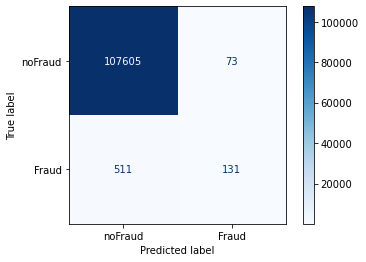

In [11]:
plot_confusion_matrix(logreg, X_test_ss, y_test, display_labels=['noFraud','Fraud'], cmap='Blues')
plt.show()

In [20]:
y.value_counts()

0    358925
1      2139
Name: is_fraud, dtype: int64

In [12]:
#set up X/y
X = df_fraud.drop(columns=['trans_date_trans_time','lat','long','job','merch_lat','merch_long','dob','is_fraud'])
y = df_fraud['is_fraud']
print(f"Target is_fraud value_counts: {y.value_counts()}")

# Instantiate Smote Class
smo = SMOTE(random_state=42)

print('====')
# Synthetically enhance minority class
X_smo, y_smo = smo.fit_resample(X,y)
print(f"Smote Target value_counts: {y_smo.value_counts()}")

# train/test
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,stratify=y_smo,train_size=0.7)

Target is_fraud value_counts: 0    358925
1      2139
Name: is_fraud, dtype: int64
====
Smote Target value_counts: 0    358925
1    358925
Name: is_fraud, dtype: int64


In [13]:
# instantiate class object
ss = StandardScaler()

# Scale Data 
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

train Acc: 1.0
test Acc: 0.9977432716060848


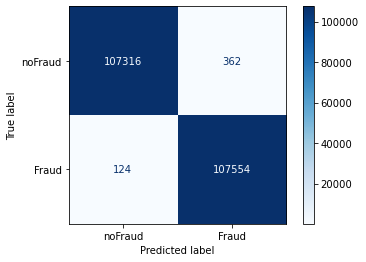

In [14]:
# train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_ss,y_train)

# score model
print(f"train Acc: {dt.score(X_train_ss,y_train)}")
print(f"test Acc: {dt.score(X_test_ss,y_test)}")

# Confusion Matrix
plot_confusion_matrix(dt, X_test_ss, y_test, display_labels=['noFraud','Fraud'], cmap='Blues')
plt.show()

In [12]:
with open('../app_model/dt.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(dt, pickle_out)

In [74]:
with open('../app_model/dt.pkl', 'rb') as pickle_in:
    dt = pickle.load(pickle_in)

In [75]:
dt.predict(X_test_ss)

array([1, 1, 0, ..., 0, 1, 0])

In [146]:
dt.predict([X_test_ss[0]])

array([1])